# Project: Sentiment Analysis on Bengali Book Reviews

In this project we will classify the sentiment of a review either it is positive or negative. To do this, we have created a dataset of $1000$ bengali book reviews. In this dataset  $528$ reviews are annotated as Positive Sentiment and another $472$ reviews as negative sentiment. All the Reviews are collected from different online book shops and then manually annotated by two native bengali speaker.  
Here, Negative Reviews are labled as 0 and Positive reviews as 1.

**Project Includes:**

-   Preprocessing 
-   Exploratory Analysis
-   Feature Extraction using TF-IDF for N-gram
-   Machine Learning Model Development
-   Evaluation Measure 
-   Saved the Final Model
-   Model Deployment

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='book_stopwords.txt'

## Importing the Dataset

In [2]:
# Read the data and take only 1000 Reviews
data = pd.read_excel('BookReviews.xlsx',encoding='UTF-8')[:1000]
data.Sentiment = data.Sentiment.replace({1:'Positive',0:'Negative'})
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='Negative']))

Total Reviews: 1000 
Total Positive Reviews: 528 
Total Negative Reviews: 472


In [3]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print(data.Review[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

দয়া করে কোনো বাঙালি বইটি কিনবেন না। দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন। 
 Sentiment:--  Negative 

অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔 
 Sentiment:--  Negative 

ফালতু লুতুপুতু প্রেমকাহিনী 
 Sentiment:--  Negative 

পড়তেই কষ্ট হয় 
 Sentiment:--  Negative 

শংকরের বিখ্যাত এই বইটা অবশেষে শেষ করলাম । বেশ দীর্ঘ সময় নিয়ে পড়ে শেষ করতে হয়েছে এটা । আমার কাছে মনে হয়েছে উপন্যাসের শুরুতে লেখক যেরকম আগ্রহ ধরে রাখতে পেরেছেন পরবর্তীতে আর তেমনটা পারেন নি। পুরো বই জুড়ে লেখক সেই একই শাহজাহান হোটেলের বর্ননা দিয়ে যাচ্ছেন তো যাচ্ছেন ই । মাঝে মাঝে মনে হয়েছে বইটা একটা আবাসিক শান শওকত ওয়ালা হোটেলে কর্মরত কোন এক কর্মচারীর ডায়রী। পুরো বইতে লেখক শাহজাহান হোটেলের নাম নিয়েই গেছেন অথচ এই "শাহজাহান" বানানটাই ইচ্ছে করে বার বার শাজাহান লেখেছেন, যেটা কলকাতা কেন্দ্রীক বুদ্ধিজীবী দের স্বভাব বলুন আর নষ্টামি ই বলুন, এছাড়া আর কিছু নয় ।  
 Sentiment:--  Negative 

এটা কোনো সাইন্স ফিকশন না, পুরাই হতাশ। 
 Sentiment:--  Negative 

সত্য মিথ্যার বেড়াজালে এক চমৎকার কাজ। অনেকাংশেই তথ্য বিকৃতিতে ভরপুর, উপন্যাসের শেষ

## Data Processing 
This step includes removal of punctuation mark, numbers, emoji and stopwords from the reviews. We have used a helper functions for cleaning the corpus.
 

In [4]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Apply the function into the dataframe
data['cleaned'] = data['Review'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = True)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print('Original:\n',data.Review[i],'\nCleaned:\n',data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')   

Original:
 দয়া করে কোনো বাঙালি বইটি কিনবেন না। দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন। 
Cleaned:
 দয়া কোনো বাঙালি বইটি কিনবেন না দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন 
 Sentiment:--  Negative 

Original:
 অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔 
Cleaned:
 অনুবাদ মান আরো ভালো করা উচিত ছিল 
 Sentiment:--  Negative 

Original:
 ফালতু লুতুপুতু প্রেমকাহিনী 
Cleaned:
 ফালতু লুতুপুতু প্রেমকাহিনী 
 Sentiment:--  Negative 

Original:
 পড়তেই কষ্ট হয় 
Cleaned:
 পড়তেই কষ্ট হয় 
 Sentiment:--  Negative 

Original:
 শংকরের বিখ্যাত এই বইটা অবশেষে শেষ করলাম । বেশ দীর্ঘ সময় নিয়ে পড়ে শেষ করতে হয়েছে এটা । আমার কাছে মনে হয়েছে উপন্যাসের শুরুতে লেখক যেরকম আগ্রহ ধরে রাখতে পেরেছেন পরবর্তীতে আর তেমনটা পারেন নি। পুরো বই জুড়ে লেখক সেই একই শাহজাহান হোটেলের বর্ননা দিয়ে যাচ্ছেন তো যাচ্ছেন ই । মাঝে মাঝে মনে হয়েছে বইটা একটা আবাসিক শান শওকত ওয়ালা হোটেলে কর্মরত কোন এক কর্মচারীর ডায়রী। পুরো বইতে লেখক শাহজাহান হোটেলের নাম নিয়েই গেছেন অথচ এই "শাহজাহান" বানানটাই ইচ্ছে করে বার বার শাজাহান লেখেছেন, যেটা কলক

In [91]:
data.cleaned.to_excel('clean_reviews.xlsx')

##### Processing of a sample review

In [27]:
tweet = 'অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔'
stopwords_list ='book_stopwords.txt'
process_reviews(review = tweet, stopwords =stopwords_list,removing_stopwords=True)

'অনুবাদ মান আরো ভালো করা উচিত ছিল'

## Dataset Summary

In [6]:
from utils import data_summary
documents,words,u_words,class_names = data_summary(data)


Class Name :  Positive
Number of Documents:528
Number of Words:10898
Number of Unique Words:3486
Most Frequent Words:

বই	429
বইটি	232
অনেক	170
ভালো	151
অসাধারণ	115
না	89
বইটা	76
খুব	74
পড়ে	70
এক	66

Class Name :  Negative
Number of Documents:472
Number of Words:12765
Number of Unique Words:4169
Most Frequent Words:

বই	294
না	242
ভালো	117
মনে	96
অনুবাদ	89
হয়েছে	83
বইটা	81
হয়	80
কিন্তু	80
বইয়ের	73


### Dataset Summary Visualization

In [7]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names         Category  Values
0    Positive  Total Documents     528
1    Negative  Total Documents     472
2    Positive      Total Words   10898
3    Negative      Total Words   12765
4    Positive     Unique Words    3486
5    Negative     Unique Words    4169


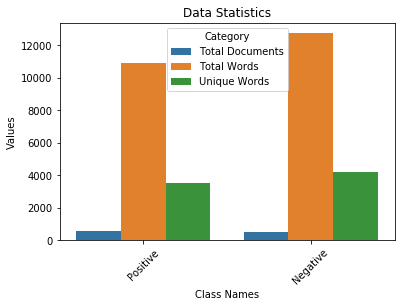

In [8]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
plt.savefig('data_statistics.png',dpi = 600,bbox_inches = 'tight')

### Review Length Distribution

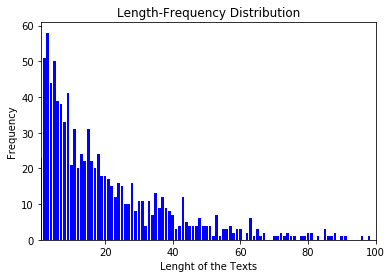

Maximum Length of a review: 523
Average Length of a reviews: 24.0


In [10]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.savefig('length_dist.png',dpi = 600,bbox_inches = 'tight')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")


### Save the cleaned data and stopwords into a pickle file

In [4]:
cleaned_data = pd.read_excel('clean_reviews.xlsx')
import pickle
# open a file, where you ant to store the data
file = open('book_review_data.pkl', 'wb')

# dump information to that file
pickle.dump(cleaned_data, file)

In [6]:
data = open('book_review_data.pkl','rb')
data = pickle.load(data)


In [15]:
stp = open(stopwords_list,'r', encoding='utf-8').read().split()
# pickle stopwords
import pickle
# open a file, where you ant to store the data
file = open('book_stopwords.pkl', 'wb')

# dump information to that file
pickle.dump(stp, file)

In [20]:
data1 = open('book_stopwords.pkl','rb')
data1 = pickle.load(data1)


list

## Feature Extraction Using TF-IDF

In [5]:
from utils import calc_unigram_tfidf,calc_bigram_tfidf,calc_trigram_tfidf,show_tfidf

In [7]:
tweet= 'বইটা ফালতু'
cv,feature_vector = calc_unigram_tfidf(data.cleaned)  
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)
#first_vector = tfidf.transform([samp_review]).toarray()

Shape of TF-IDF Corpus =====> (1000, 6292) 

Sample Review:  বইটা ফালতু
          tfidf
ফালতু  0.806771
বইটা   0.590864


In [9]:
#help(calc_unigram_tfidf)

## ML Model Development Using Unigram Feature

### Unigram Tf-idf Feature Extraction, Label Encoding and Splitting

In [6]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 6292

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 800 
	Test			 200


### Model Defination

In [7]:
from utils import model_performace,ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)


### Performance Table  

In [8]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,F1 Score,Precision,Recall
LR,91.5,92.44,91.23,93.69
DT,80.5,82.19,83.33,81.08
RF,89.5,90.75,88.79,92.79
MNB,93.0,93.91,90.76,97.30
KNN,83.0,86.40,77.70,97.30
Linear SVM,89.0,89.81,92.38,87.39
RBF SVM,90.0,90.74,93.33,88.29
SGD,92.5,93.45,90.68,96.40


In [9]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 93.0
Highest F1-Score achieved by MNB at = 93.91000000000001
Highest Precision Score achieved by RBF SVM at = 93.33
Highest Recall Score achieved by MNB at = 97.3


### ROC Curve

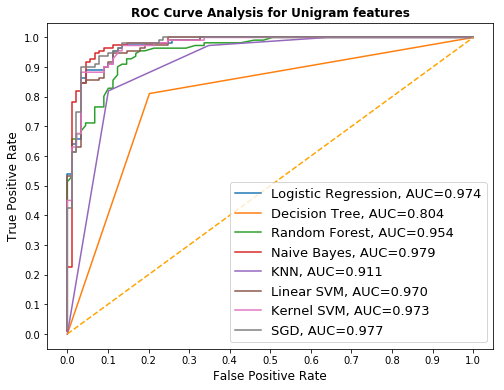

In [7]:
from utils import plot_roc_curve,ml_models_for_unigram_tfidf
## classifiers defination
gram_models = ml_models_for_unigram_tfidf() 

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

### Precision-Recall Curve

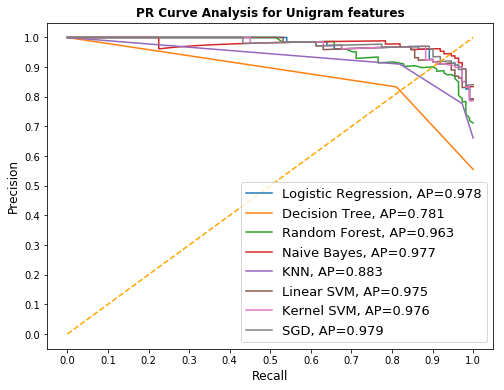

In [9]:
from utils import plot_PR_curve,ml_models_for_unigram_tfidf

gram_models = ml_models_for_unigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

## Model Development Using Bigram Feature

### Bi-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [10]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 25193

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 800 
	Test			 200


### Model Defination

In [11]:
from utils import model_performace,ml_models_for_bigram_tfidf
                
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)


### Performance Table

In [12]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,F1 Score,Precision,Recall
LR,90.0,91.15,89.57,92.79
DT,80.5,82.51,82.14,82.88
RF,91.5,92.51,90.52,94.59
MNB,93.0,93.91,90.76,97.30
KNN,90.0,91.23,88.89,93.69
Linear SVM,89.5,90.23,93.27,87.39
RBF SVM,89.5,90.23,93.27,87.39
SGD,92.0,92.92,91.30,94.59


In [10]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 93.0
Highest F1-Score achieved by MNB at = 93.91000000000001
Highest Precision Score achieved by SGD at = 95.24000000000001
Highest Recall Score achieved by MNB at = 97.3


### ROC Curve

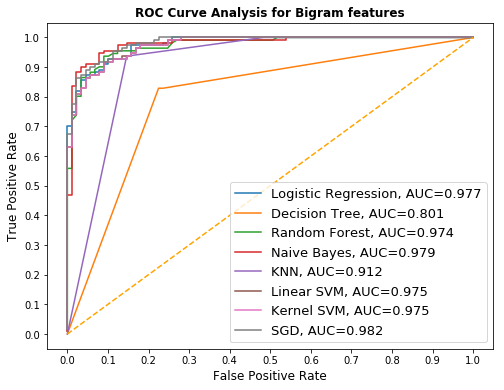

In [14]:
from utils import plot_roc_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Precision-Recall Curve

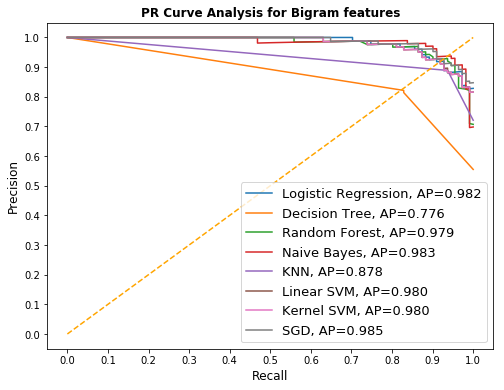

In [15]:
from utils import plot_PR_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Model Development Using Tri-gram Feature

### Tri-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [16]:
from utils import label_encoding,dataset_split
from utils import calc_trigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 46176

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 800 
	Test			 200


### Model Defination

In [17]:
from utils import model_performace,ml_models_for_trigram_tfidf
            

# Classifiers Defination
ml_models,model_names = ml_models_for_trigram_tfidf()             

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_trigram.json', 'w') as f:
    json.dump(accuracy, f)


### Performance Table

In [18]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_trigram.json'))
table = performance_table(accuracy)
table


,Accuracy,F1 Score,Precision,Recall
LR,89.5,90.83,88.14,93.69
DT,79.0,80.91,81.65,80.18
RF,91.0,92.04,90.43,93.69
MNB,91.5,92.64,89.17,96.40
KNN,90.5,91.70,88.98,94.59
Linear SVM,88.0,90.00,83.72,97.30
RBF SVM,90.0,90.83,92.52,89.19
SGD,91.0,91.96,91.15,92.79


In [17]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 91.5
Highest F1-Score achieved by MNB at = 92.64
Highest Precision Score achieved by SGD at = 94.34
Highest Recall Score achieved by Linear SVM at = 97.3


### ROC Curve

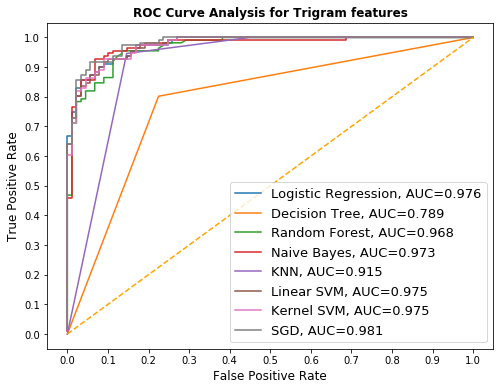

In [20]:
from utils import plot_roc_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

### Precision-Recall

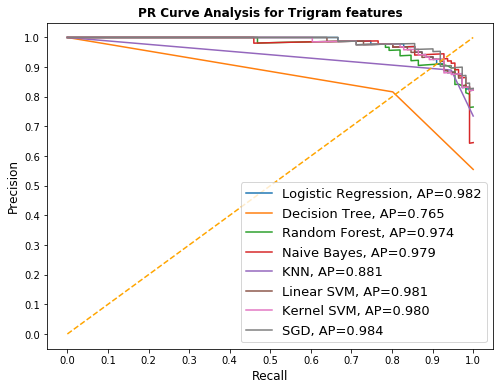

In [21]:
from utils import plot_PR_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

## Final Model

- Selected Feature: Unigram
- Selected Model : Multinomial Naive Bayes

In [96]:
from sklearn.naive_bayes import MultinomialNB

from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 6292

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1000 
	Training		 800 
	Test			 200


In [11]:
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train,y_train) 
y_pred = mnb_model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)*100

93.0

### Saved the model for reuse again

In [12]:
import pickle
# open a file, where you ant to store the data
file = open('book_review_mnb.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)

In [13]:
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)

In [15]:
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.93000000000000005

## Check a Review Sentiment using our model

In [92]:
# load the model
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)
######
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
feature = cv.transform([processed_review]).toarray()

sentiment = nb.predict(feature)

if (sentiment ==0):
    print(f"It is a Negative Review ")
else:
    print(f"It is a Positive Review ")


It is a Negative Review 


In [95]:
sentiment = nb.predict_proba(feature)
round(max(sentiment.reshape(-1)),2)*100

88.0

In [106]:
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)
processed_review

''